In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas, numpy, seaborn
import scipy, scipy.signal
import matplotlib, matplotlib.pyplot
from scipy.stats import zscore
import seaborn as sns
import qnorm 
matplotlib.rcParams.update({'font.size':15, 'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})


In [3]:
tpm = pandas.read_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/tpm.csv', index_col=0)
print(tpm.shape)
tpm.head()

(60660, 521)


,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,fbc34a61-f35f-491b-a610-755582447f66,fc853d38-8069-41b0-af9c-77925a3f8063,fcc7bbfe-602a-4780-80fa-924fa8a18ecb,fd2f3554-eb54-4ce2-a588-a17438c4ba18,fdc1657e-e27f-4c79-97a0-6b6392aed9f4,fdc7d01c-8737-4959-a13f-a6f85f037e65,feabad6d-2c34-4491-bfd3-afd36b1435fc,fecd3669-e812-49ce-8914-9d84ded36f35,ff101b50-3317-4296-a0bf-2316cb4b039a,ffe2a9f5-b8ca-490f-b9b0-656738c3b586
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,19.4123,31.8278,80.8500,41.2435,39.2759,59.5595,32.3194,49.0701,49.1113,72.6895,...,61.1470,53.7333,43.4870,58.2455,50.6765,13.9388,29.0371,80.3408,26.2673,29.4411
ENSG00000000005.6,0.1240,0.0574,0.3693,0.1329,0.2247,0.4833,0.1869,0.1058,0.1501,0.0447,...,0.0364,0.1612,0.1912,0.1951,0.0888,0.0192,0.0232,0.4528,0.0280,0.0877
ENSG00000000419.13,40.4957,83.6473,121.4975,57.5444,72.3126,106.6697,86.1143,80.7573,101.3053,84.7645,...,95.4733,109.3213,88.2835,89.6461,76.0481,33.9655,59.3800,87.8006,37.8697,59.5023
ENSG00000000457.14,5.0002,5.2668,14.0190,4.3661,4.4973,13.8262,6.5052,8.5967,9.7299,9.6728,...,6.0781,7.1652,10.5204,6.2329,7.4871,2.0954,3.0456,5.2913,4.2811,2.5663
ENSG00000000460.17,0.7564,1.7167,2.4786,2.0541,0.7963,2.6286,1.0472,2.1619,2.6097,2.9540,...,2.8553,3.1190,2.4864,1.4758,2.1306,0.5279,0.9540,1.7350,0.6369,0.5636


In [4]:
#filter out genes that (almost) never show up   
expressed_genes = tpm[tpm.max(axis=1) >= 8]
expressed_genes.shape

(18986, 521)

In [5]:
#bring data to log2 TPM +1
log2_tpm_PO = numpy.log2(expressed_genes + 1)
log2_tpm_PO


,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,fbc34a61-f35f-491b-a610-755582447f66,fc853d38-8069-41b0-af9c-77925a3f8063,fcc7bbfe-602a-4780-80fa-924fa8a18ecb,fd2f3554-eb54-4ce2-a588-a17438c4ba18,fdc1657e-e27f-4c79-97a0-6b6392aed9f4,fdc7d01c-8737-4959-a13f-a6f85f037e65,feabad6d-2c34-4491-bfd3-afd36b1435fc,fecd3669-e812-49ce-8914-9d84ded36f35,ff101b50-3317-4296-a0bf-2316cb4b039a,ffe2a9f5-b8ca-490f-b9b0-656738c3b586
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,4.351367,5.036846,6.354911,5.400657,5.331845,5.920281,5.058291,5.645877,5.647064,6.203387,...,5.957613,5.774347,5.475312,5.888634,5.691436,3.900992,4.908674,6.345907,4.769100,4.927949
ENSG00000000419.13,5.374890,6.403392,6.936608,5.871459,6.195989,6.750468,6.444838,6.353276,6.676737,6.422309,...,6.592058,6.785568,6.480322,6.502173,6.267687,5.127860,5.915999,6.472498,5.280574,5.918918
ENSG00000000457.14,2.585011,2.647729,3.908717,2.423874,2.458723,3.890077,2.907891,3.262538,3.423565,3.415867,...,2.823362,3.029488,3.526119,2.854574,3.085272,1.630126,2.016354,2.653358,2.400838,1.834428
ENSG00000000938.13,2.610275,3.567631,3.186786,4.123310,2.984334,2.235268,2.497919,3.994725,4.796421,3.459327,...,2.766256,5.061085,2.791668,3.938916,3.198651,3.050780,4.228272,2.466810,4.006047,2.478299
ENSG00000000971.16,3.133695,7.188441,5.688273,6.598810,2.575216,6.281372,3.032753,5.202265,5.200881,6.852400,...,8.101244,7.153417,3.396009,6.215613,5.568950,4.059035,5.427150,3.343237,4.681567,4.727904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288573.1,2.541118,1.498149,3.072192,0.911193,1.917890,1.788477,2.512075,1.611408,1.445356,1.753433,...,1.173127,2.483545,1.861757,1.228973,1.585491,1.248656,1.197551,2.560470,1.876212,2.165076
ENSG00000288596.2,3.140697,2.158919,3.460860,1.627000,1.813771,2.486328,3.100843,2.434108,2.816108,2.643187,...,2.062467,2.828530,2.305358,2.729466,2.277241,1.799958,2.223608,2.637912,2.706398,2.537097
ENSG00000288612.1,2.267206,0.692070,1.013498,0.464877,0.606158,1.377624,1.634500,0.812621,1.577973,0.699552,...,0.475915,1.026871,0.453333,1.441377,0.415218,0.600079,0.742610,0.647637,1.287886,1.182438


80
18.15245025585937


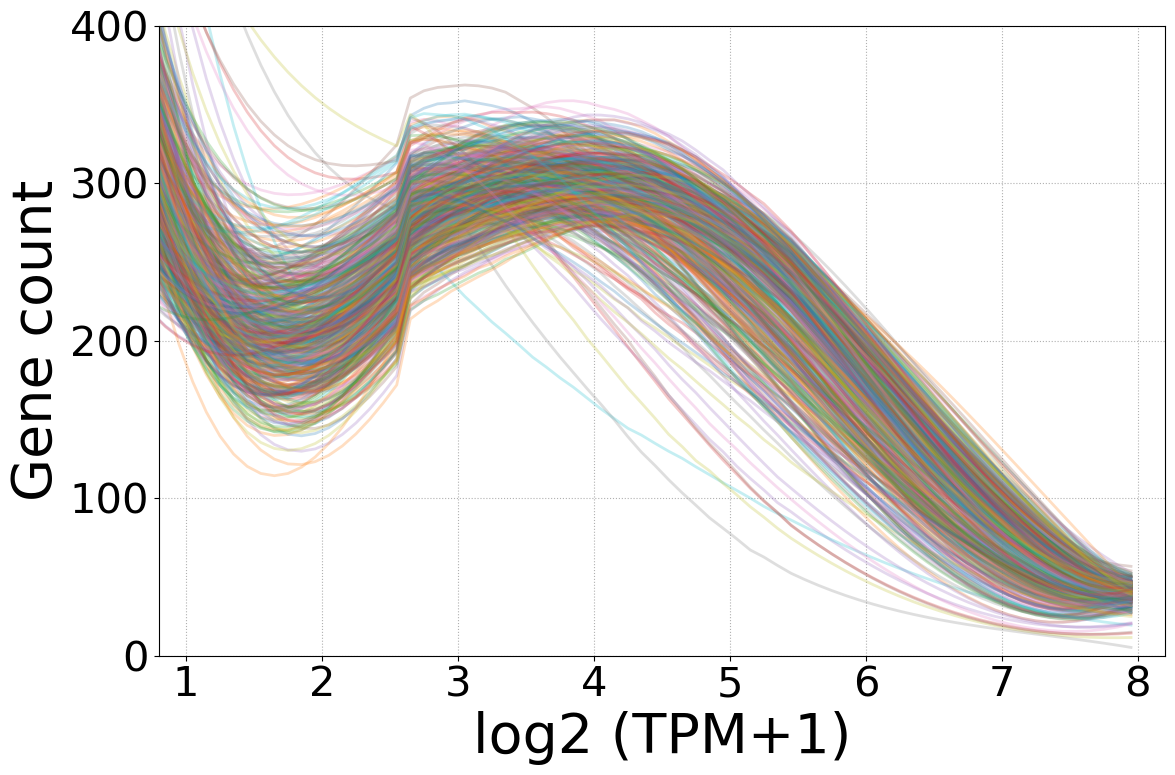

In [6]:
'''HISTOGRAM'''

found_max = 8 # especifico el valor màxim aqui. El poso una mica mes alt
number_of_bins = found_max*10
print(number_of_bins)

absolute_max = 0  #defineixo absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()  #afegeixo les columnes amb les que vull treballar a una llista working_samples

most_likely_expressions = []
all_hats = []
for sample in working_samples:
    
    log2TPM = log2_tpm_PO.loc[:, sample] #selecciono una columna i la guardo a log2TPM
    if max(log2TPM) > absolute_max:   #si el valor maxim de log2TPM és major que l'absolut_max, absolut_max passa a ser aquest valor
        absolute_max = max(log2TPM)
       
    #print(numpy.min(log2TPM), numpy.max(log2TPM))
    
    # agafa el valor de dalt del mig de cada barra
    # agafa els 2 valors dels extrems de baix de cada barra i resta i divideix entre 2 per obtenir un unic valor de baix 
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin   
    x = x[:-1]   #elimina l'ultim valor pq no el necessitem
    
    #print(x)   #--> fem un 'print' per veure les dades i agafar el segon pic
    #print(hist)
    
    plotting_x = x#[1:500] #depen de com surti lhistograma agafem a pertir de unes dades o altres 
    plotting_hist = hist
    #print(plotting_x)
    
    #matplotlib.pyplot.plot(plotting_x, plotting_hist,'.', alpha=1/3)
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=2, alpha = 1/4)
    
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    all_hats.append(yhat)
    
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)+0.75, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

print(absolute_max)
    

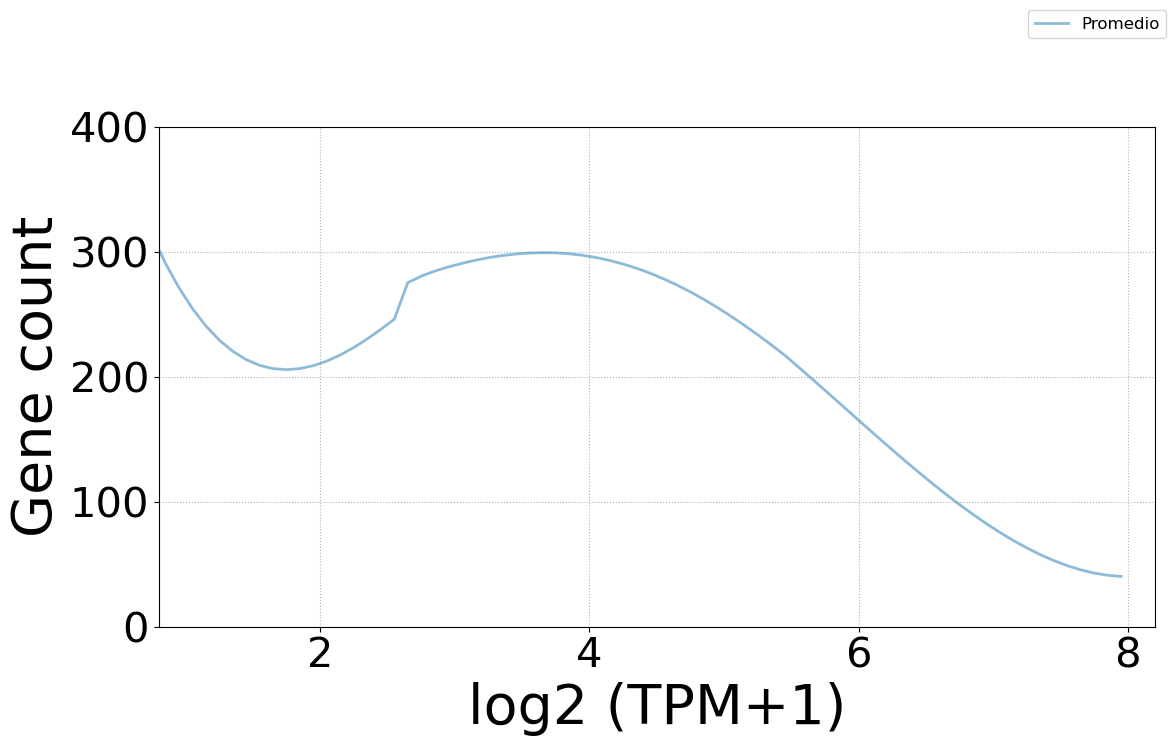

In [7]:

# Cálculo de la línea promedio
average_line = np.mean(all_hats, axis=0)

# Definición de los valores x para el gráfico
x_values = plotting_x

# Trazar la línea promedio
plt.plot(x_values, average_line, '-', lw=2, alpha=1/2, label='Promedio')

plt.xlim([np.min(x_values) + 0.75, np.max(x_values) + 0.25])
plt.ylim([0, 400])
plt.xlabel('log2 (TPM+1)')
plt.ylabel('Gene count')
plt.grid(ls=':')
plt.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))
plt.tight_layout()
plt.show()


In [8]:
# We have a DataFrame called 'log2_tpm_PO' with gene expresion data and we want to distinguish the top_500 genes from the 
#other ones. Top 500 genes are the ones with higher mean and higher variance. 

# Calcula la media y la varianza de expresión para cada gen
average_expression = log2_tpm_PO.mean(axis=1)
variance_by_rows = log2_tpm_PO.var(axis=1)

# Calcula los puntajes Z para las columnas 'Average' y 'Variance'
average_zscores = zscore(average_expression)
variance_zscores = zscore(variance_by_rows)

# Calcula el puntaje de bondad sumando los puntajes Z de media y varianza
goodness_score = average_zscores + variance_zscores

# Crea un DataFrame con los puntajes de bondad y los nombres de los genes
genes_exp = pd.DataFrame({'Goodness_Score': goodness_score, 'Gene_Name': log2_tpm_PO.index})

# Selecciona los 500 genes con los puntajes de bondad más altos
top_500_genes = genes_exp.nlargest(500, 'Goodness_Score')

#Select the 50 top genes 
top_50_genes = genes_exp.nlargest(50, 'Goodness_Score')

#Select the 1000 top genes 
top_1000_genes = genes_exp.nlargest(1000, 'Goodness_Score')

#Select the 2000 top genes 
top_2000_genes = genes_exp.nlargest(2000, 'Goodness_Score')



# Muestra los primeros 5 genes en la lista de los mejores 500 genes
print(top_500_genes.head(5))

                   Goodness_Score          Gene_Name
gene_id                                             
ENSG00000211592.8       19.459970  ENSG00000211592.8
ENSG00000211896.7       19.187173  ENSG00000211896.7
ENSG00000239951.1       15.101965  ENSG00000239951.1
ENSG00000253755.1       14.279649  ENSG00000253755.1
ENSG00000211895.5       14.068674  ENSG00000211895.5


In [9]:
#We use '.transpose()' function to change df format so we obtain values that were in columns now in rows and viceversa
transpose = log2_tpm_PO.transpose()
print(transpose.shape)
transpose.head()
transpose = transpose.dropna()
transpose

(521, 18986)


gene_id,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,...,ENSG00000288398.1,ENSG00000288543.1,ENSG00000288547.3,ENSG00000288558.2,ENSG00000288559.1,ENSG00000288573.1,ENSG00000288596.2,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288670.1
00f54652-691e-4446-869a-4dd51c236f56,4.351367,5.374890,2.585011,2.610275,3.133695,5.695910,3.336098,4.101995,2.679424,5.199743,...,2.895574,0.000000,2.705779,1.971516,1.612069,2.541118,3.140697,2.267206,0.245009,2.961197
017f7806-7804-43b9-8123-e1b48d2d6496,5.036846,6.403392,2.647729,3.567631,7.188441,5.396410,3.753476,4.853177,2.432612,5.337971,...,2.273247,2.817623,0.640251,1.055196,1.395885,1.498149,2.158919,0.692070,0.210389,3.231171
02baceff-cbab-41cb-b801-be18ad6991b2,6.354911,6.936608,3.908717,3.186786,5.688273,5.910279,4.933129,5.779504,2.667438,5.551842,...,4.697963,0.000000,0.880019,3.231156,2.247988,3.072192,3.460860,1.013498,1.273456,4.651649
036f7712-a636-4198-b568-6c85d9db4a3b,5.400657,5.871459,2.423874,4.123310,6.598810,5.631902,3.638711,4.427928,2.903366,5.438586,...,3.041839,2.248049,0.882056,1.190488,1.209266,0.911193,1.627000,0.464877,0.092343,3.092241
0386037f-728c-47b0-93d0-6bb81b8b2a05,5.331845,6.195989,2.458723,2.984334,2.575216,6.038208,4.588091,4.207721,3.067725,5.763497,...,4.091810,0.000000,4.018892,2.295488,1.164915,1.917890,1.813771,0.606158,2.268794,4.301668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdc7d01c-8737-4959-a13f-a6f85f037e65,3.900992,5.127860,1.630126,3.050780,4.059035,4.410199,2.610298,3.211277,1.692249,4.092774,...,2.196450,0.598460,1.176004,1.245557,0.751549,1.248656,1.799958,0.600079,0.080521,2.650558
feabad6d-2c34-4491-bfd3-afd36b1435fc,4.908674,5.915999,2.016354,4.228272,5.427150,5.537091,3.542184,4.094886,2.557214,5.414670,...,2.612754,1.025383,2.188528,1.469990,0.778965,1.197551,2.223608,0.742610,0.016639,3.729596
fecd3669-e812-49ce-8914-9d84ded36f35,6.345907,6.472498,2.653358,2.466810,3.343237,6.708222,4.026959,4.464100,2.824788,5.354427,...,4.422146,0.291721,1.633803,2.376068,1.112367,2.560470,2.637912,0.647637,0.399554,3.186691
ff101b50-3317-4296-a0bf-2316cb4b039a,4.769100,5.280574,2.400838,4.006047,4.681567,5.792348,2.758943,4.062942,2.432799,4.762349,...,2.384823,0.583904,2.051964,1.652464,0.614192,1.876212,2.706398,1.287886,0.039700,3.107018


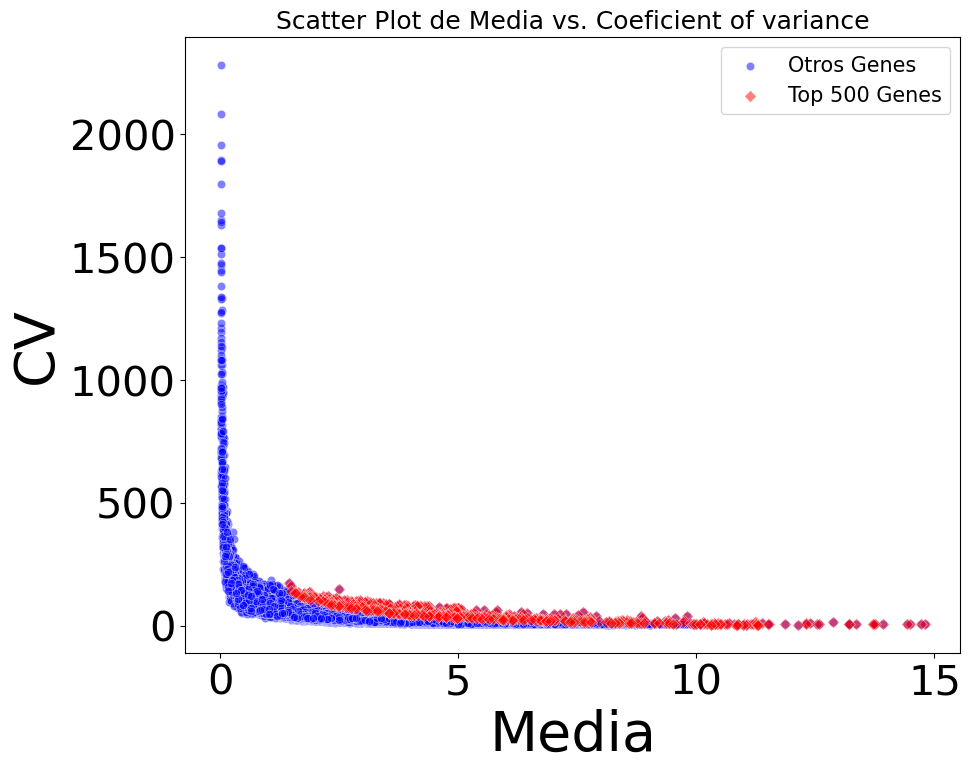

In [10]:
# SCATTERPLOT WITH COEFICIENT OF VARIANCE

# Calcular la media y la desviación estándar para cada gen
media = transpose.mean()
std_dev = transpose.std()
cv = (std_dev / media) * 100  # Calcula el CV y multiplica por 100 para obtener un porcentaje

# Crear un DataFrame con las medias y desviaciones estándar
data_for_scatter = pd.DataFrame({'Media': media, 'Coeficient of variance': cv})

# Crear un scatter plot
plt.figure(figsize=(10, 8))

mida=10

# Crear un scatter plot con todos los genes en azul y forma circular
sns.scatterplot(x='Media', y='Coeficient of variance', data=data_for_scatter, color='blue', alpha=1/2, label='Otros Genes')

# Crear un scatter plot con los 500 mejores genes en rojo y forma cuadrada
sns.scatterplot(x='Media', y='Coeficient of variance', data=data_for_scatter.loc[top_500_genes.index], color='red', marker='D', alpha=1/2, label='Top 500 Genes')

# Personalizar el scatter plot
plt.title('Scatter Plot de Media vs. Coeficient of variance')
plt.xlabel('Media')
plt.ylabel('CV')

# Mostrar el scatter plot con una leyenda
plt.legend()

# Mostrar el scatter plot
plt.show()



In [12]:
# NOW WE ARE GOING TO SAVE IN DIFFERENT DATAFRAMES AN SPECIFIC NUMBER OF TOP GENES WITHOUT NORMALIZATION TO SEE THE EFFECT 
#OF THE AMOUNT OF VARIABLES WE USE IN THE RESULTS. 

# Supongamos que 'top_genes' contiene los nombres de los genes que deseas mantener
important_50_genes = top_50_genes['Gene_Name'].tolist()

# Filtra las columnas de 'transpose' para mantener solo los genes presentes en 'top_genes'
important_50_dataframe = transpose[important_50_genes]
important_50_dataframe
important_50_dataframe.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/wn_tpm_50.csv')


############################

important_500_genes = top_500_genes['Gene_Name'].tolist()

important_500_dataframe = transpose[important_500_genes]
important_500_dataframe
important_500_dataframe.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/wn_tpm_500.csv')


######################
important_1000_genes = top_1000_genes['Gene_Name'].tolist()

important_1000_dataframe = transpose[important_1000_genes]
important_1000_dataframe.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/wn_tpm_1000.csv')

#################
important_2000_genes = top_2000_genes['Gene_Name'].tolist()

important_2000_dataframe = transpose[important_2000_genes]
important_2000_dataframe.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/wn_tpm_2000.csv')


In [13]:
important_500_dataframe

gene_id,ENSG00000211592.8,ENSG00000211896.7,ENSG00000239951.1,ENSG00000253755.1,ENSG00000211895.5,ENSG00000211677.2,ENSG00000129824.16,ENSG00000168878.19,ENSG00000211666.2,ENSG00000241351.3,...,ENSG00000168497.5,ENSG00000167996.16,ENSG00000169439.12,ENSG00000185133.14,ENSG00000163399.16,ENSG00000233913.7,ENSG00000134184.13,ENSG00000196735.13,ENSG00000175567.11,ENSG00000130522.6
00f54652-691e-4446-869a-4dd51c236f56,12.654493,11.277781,8.911985,7.086845,8.458653,8.776716,0.000000,1.608289,7.351107,7.335330,...,5.095431,5.555825,7.502479,7.906665,4.362603,7.457295,3.903800,4.071016,8.676714,9.458780
017f7806-7804-43b9-8123-e1b48d2d6496,11.151510,7.076933,7.212101,6.423035,10.290145,9.133247,0.000000,7.124737,6.624360,6.257705,...,5.527859,9.926294,7.912559,7.213469,7.080650,2.517880,0.000000,6.097440,7.906330,8.838379
02baceff-cbab-41cb-b801-be18ad6991b2,13.240121,11.884235,9.081297,8.065871,10.190219,9.284320,8.807838,6.320519,7.814719,8.420038,...,7.408911,5.978717,10.312363,8.497121,8.993038,4.693387,5.309642,5.662470,6.805846,9.103694
036f7712-a636-4198-b568-6c85d9db4a3b,15.350830,13.716034,10.326256,9.049730,11.198357,10.037491,0.277390,11.611193,10.106444,9.531090,...,3.967888,8.549370,7.611307,5.870256,7.457535,3.417299,0.018634,5.914112,8.511874,8.131367
0386037f-728c-47b0-93d0-6bb81b8b2a05,8.687352,6.493431,3.608040,3.787662,8.254596,5.477386,0.072037,0.297015,3.002288,2.731270,...,6.788649,5.900244,7.998607,9.047644,6.847600,2.925791,0.000000,1.917890,9.601076,7.869111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdc7d01c-8737-4959-a13f-a6f85f037e65,8.346090,5.671480,3.971976,3.230680,7.111472,4.613219,0.000000,9.824737,3.132347,2.809682,...,4.338710,6.178241,6.465130,6.316778,4.391699,2.231862,0.000000,4.254843,7.981995,7.695889
feabad6d-2c34-4491-bfd3-afd36b1435fc,13.484108,11.729264,9.420037,8.632927,10.653020,9.818323,0.432532,7.808003,8.262732,8.003686,...,4.830671,7.351686,7.298894,6.950323,6.325833,3.905890,0.076696,5.266944,8.755988,8.302267
fecd3669-e812-49ce-8914-9d84ded36f35,7.419147,1.856428,3.267790,0.306146,6.613047,4.140304,0.389016,7.192836,3.084166,2.507947,...,5.555890,3.459943,6.810102,5.545734,5.785498,4.572496,0.031677,3.963076,9.030444,7.477109
ff101b50-3317-4296-a0bf-2316cb4b039a,11.962107,10.079871,6.798901,7.326636,9.555414,9.034763,0.252658,8.029483,5.889739,4.971010,...,4.397947,7.442463,7.041810,6.754432,3.541379,7.667343,2.015676,4.304336,8.767849,8.779354


In [14]:
# Save the normalized dataframes in a csv file 

important_50_df= important_50_dataframe.T
important_50_df= qnorm.quantile_normalize(important_50_df, axis=1)
important_50_df.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/tpm_50.csv')

important_500_df= important_500_dataframe.T
important_500_df= qnorm.quantile_normalize(important_500_df, axis=1)
important_500_df.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/tpm_500.csv')

important_1000_df= important_1000_dataframe.T
important_1000_df= qnorm.quantile_normalize(important_1000_df, axis=1)
important_1000_df.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/tpm_1000.csv')

important_2000_df= important_2000_dataframe.T
important_2000_df= qnorm.quantile_normalize(important_2000_df, axis=1)
important_2000_df.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/tpm_2000.csv')



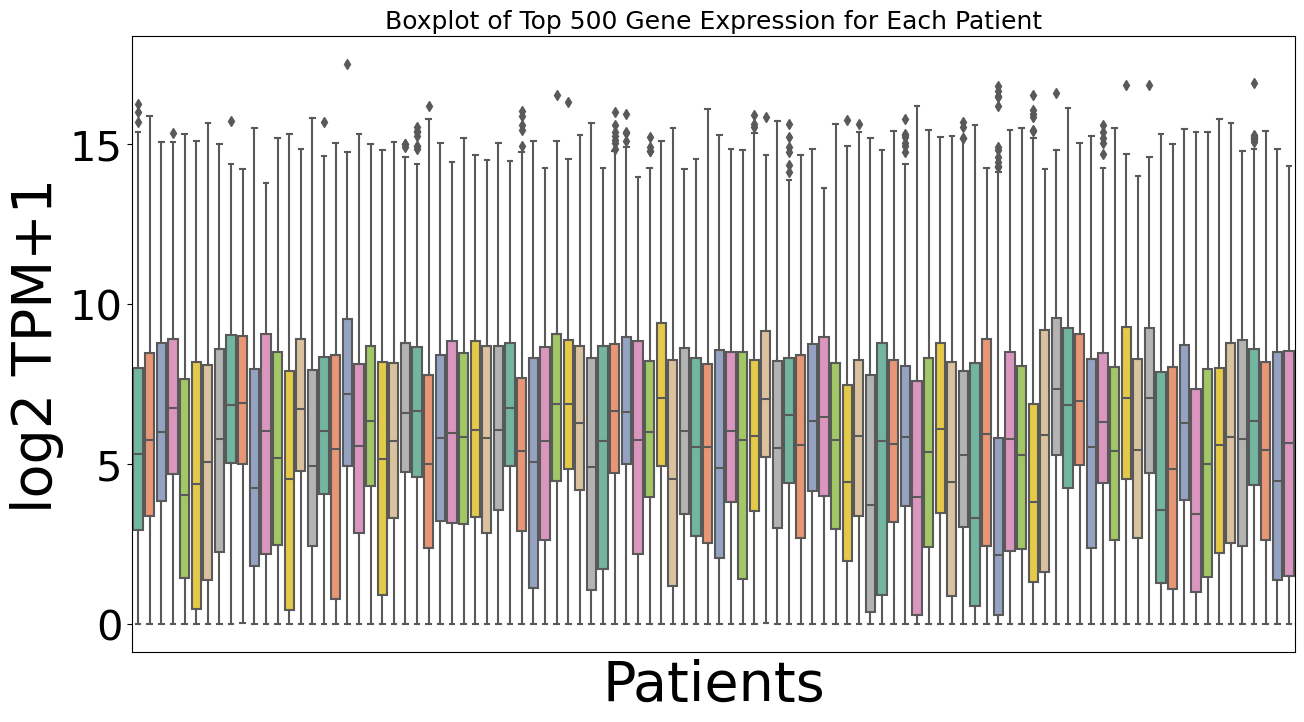

In [15]:
## boxplot of 100 patients looking at 500 top genes  

# Transponer los datos normalizados
transposed_500 = important_500_dataframe[:100].T

# Crear un boxplot para cada paciente
plt.figure(figsize=(15, 8))
sns.boxplot(data=transposed_500, orient="v", palette="Set2")

# Personalizar el gráfico
plt.ylabel('log2 TPM+1')
plt.xlabel('Patients')
plt.title('Boxplot of Top 500 Gene Expression for Each Patient')

# Muestra el gráfico
plt.xticks([])  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [17]:
#Normalize transposed_500 dataframe, which contains 100 patients and 500 genes and save it in a csv file
q500 = qnorm.quantile_normalize(transposed_500, axis=1)
q500.to_csv('/Users/user/Desktop/IKRAM UNI/23-24 UNI/Advanced bio/Proves_/qtpm_500.csv')

([], [])

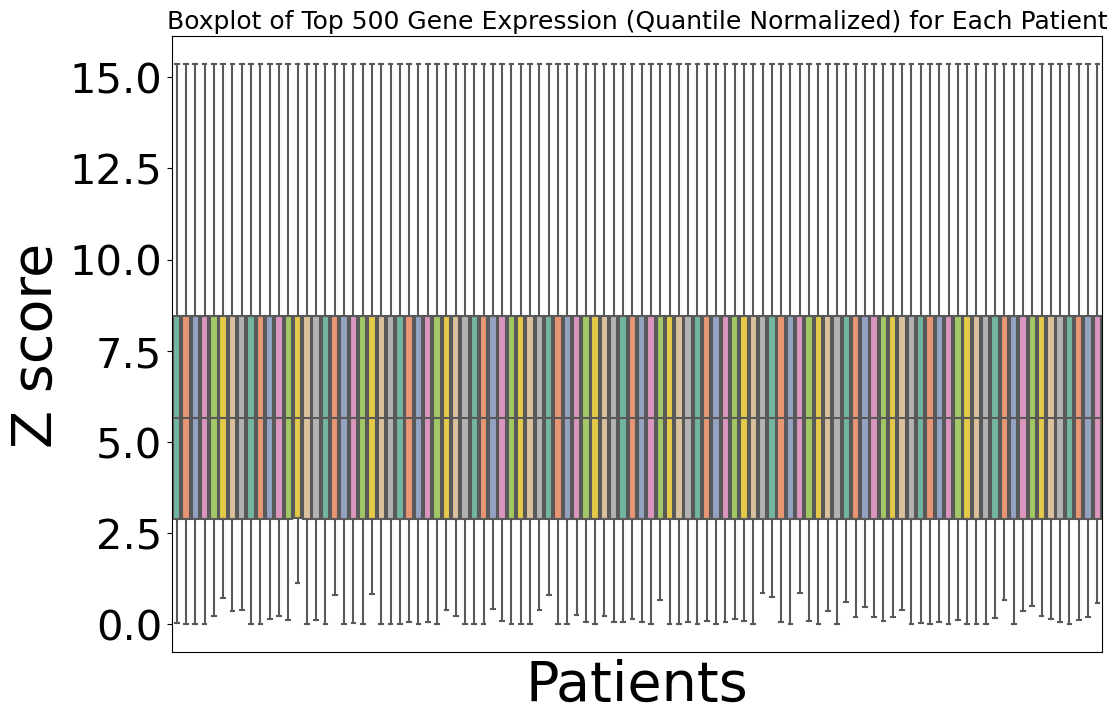

In [18]:
# Boxplot with normalized data

sns.boxplot(data=q500, orient="v", palette="Set2")
plt.ylabel('Z score')
plt.xlabel('Patients')
plt.title('Boxplot of Top 500 Gene Expression (Quantile Normalized) for Each Patient')
plt.xticks([])